In [32]:
#1 Considérer les noms et l'évolution spatiale comme étant indépendants
#2 Créer une mesure de distance entre les noms et considérer l'évolution spatiale comme étant indépendante
#3 Considérer les noms indépendants et étudier l'évolution spatiale

#Note : Placer tout ça sur une map
#Rem   
# différence d'évolution en fonction du genre ? De la religion ? Des opinions politiques ? De l'époque ?
# Les noms qui changent de genre : Il y en a ? Combien ? Est-ce prédictible ?


#Problème CA (Californie ?) A beaucoup trop par rapport aux autres. P-e qu'ils sont mieux couverts / obligés de le faire ? 
# → Donc il faudra gérer un poids pour contrebalancer les effets potentiels
# Plutôt que de travailler sur l'occurence, peut-être mieux vaut travailler sur les pourcentage (probablement !)

# > Peut-être que 20-30 ans après un prénom, un effet apparait : car les anciens nouveaux nés ont des enfants et p-e
# que le nom qu'ils leur donnent ont un lien avec le leur ? (Je doute que ce soit notable mais qui sait ?)

# Créer une distance entre les noms.


# Main Part

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

## On récupère le jeu de données

In [2]:
path = '/Users/louis/Desktop/Tsinghua/Machine Learning/1_Project/DataSet/'
state = 'Full_Data'
full_path = path+state+'.csv'

data_set = pd.read_csv(full_path)



In [3]:
criteria = "Percent"
period = [year for year in range(1910, 2017)]
# OR → criteria = "Percent"
# OR → criteria = "Occurence"

## Ensemble de fonctions utiles

#### SELECT type functions

In [47]:
# REM : f(a|b, c) means f(a) knowing b and c (e.g. with b and c fixed)

# INPUT : State & Name
# OUTPUT : Occurence = f(Year|State, Name)
def get_year(state, name, data_set_= data_set):
    return data_set_[data_set_["State"]==state][data_set_["Name"]==name]

# INPUT : Name
# OUTPUT : for each State : Occurence = f(year|State, Name)
def get_year_list(name, data_set_= data_set):
    return data_set_[data_set_["Name"]==name].pivot_table(index=["Year"],columns='State',values="Occurence")

# INPUT : Name
# OUTPUT : On average for the USA : Occurence = f(year|Name)
def get_year_USA(name, data_set_=data_set):
    if criteria=="Percent" : print("/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ ")
    return data_set_[data_set_["Name"]==name].pivot_table(index=["Year"],columns='State',values="Occurence").sum(axis=1)

    
# INPUT : Year & Name
# OUTPUT : Occurence = f(State|Year, Name)    
def get_state(year, name, data_set_= data_set):
    return data_set_[data_set_["Year"]==year][data_set_["Name"]==name]

# INPUT : Year & State
# OUTPUT : Occurence = f(Name|Year, State)
def get_name(year, state, data_set_= data_set):
    return data_set_[data_set_["Year"]==year][data_set_["State"]==state]


# OUTPUT : List of every states in the data set
def get_list_states(data_set_ = data_set):
    return data_set["State"].drop_duplicates()


# INPUT (optional) unique = False => ith name is the most popular in the (1910+i)th year
#       (optional) period = [a,b] => only select the popular names from this period
# OUTPUT : For every year of the period, returns the most popular among the states with the number of occurences
# FORMAT : LIST
def get_list_most_used_names_year(unique = True, data_set_ = data_set):
    temp_val = data_set_.pivot_table(index="Year", columns=["Name","State"],values="Occurence").idxmax(axis=1).values
    name_list = [name for (name, state) in temp_val]
    if not unique:
        return name_list
    return [name_list[i] for i in sorted(np.unique(name_list, return_index=True)[1])]

##################################################

# >> NOT THE MOST USEFULL FUNCTIONS BELOW << 

# INPUT (optional) length = n => get the top n names. 
#       (optional) period = [a,b] => only select the popular names from this period
# OUTPUT : the most popular names among the states with the number of occurences and within the period
# FORMAT : pd.series (pandas.core.series.Series)
def get_most_used_names(length_=-1, period=(1910,2016), data_set_ = data_set):
    if criteria=="Percent" : print("/!\ get_most_used_names USES OCCURENCE, NOT PERCENT /!\ ")
    return data_set_[data_set_["Year"].isin([i for i in range(period[0],period[1]+1)])].pivot_table(index=["Year", "State"],columns='Name',values="Occurence").sum().sort_values(ascending=False)[0:length_]

# SAME AS "get_most_used_names()" but RETURNS a LIST with only the names
# FORMAT : LIST
def get_list_most_used_names(length_=-1, period=(1910,2016), data_set_ = data_set):
    return list(get_most_used_names(length_, period, data_set_).index)


#### Plot functions

In [14]:
def plot_time_evolution(state, name):
    temp_table = get_year(state,name)
    plt.plot(temp_table["Year"].values, temp_table[criteria].values, label=state+" / "+name)

def plot_time_evolution_USA(name):
    if criteria=="Percent" : print("/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ ")
    temp_table = get_year_USA(name)
    plt.plot(temp_table.index, temp_table.values, label=state+" / "+name)

    
def plot_time_evolution_USA_list(name_list, _3D = False):
    %matplotlib inline
    figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    if _3D:
        y_axis = np.array([i for i in range(0, len(name_list))])
        x_axis = np.array(period)
        z_axis = np.array([get_year_USA(name).reindex(range(1910,2017)).fillna(0).values.tolist() for name in name_list])
        fig = plt.figure(figsize=(15, 12), dpi= 80, facecolor='w', edgecolor='k')
        ax = fig.gca(projection='3d')

        for i, name in enumerate(name_list):
            ax.bar(x_axis, z_axis[i], i, zdir='y', alpha=0.5)
            #ax.bar(np.concatenate(x_axis, z_axis[i]))

        ax.set_yticks(range(0,len(name_list)))
        ax.set_yticklabels(name_list, fontsize=18)
   #2D
    else:
        for name in name_list:
            plot_time_evolution_USA(name)
    plt.legend()
    

# PAS TRES UTILE MAIS QUI SAIT ? JE PREFERE LA GARDER LA EN ATTENDANT    
def plot_surface():
    %matplotlib inline

    name_list = get_list_most_used_names_year()
    y_axis = np.array([i for i in range(0, len(name_list))])
    x_axis = np.array(period)
    z_axis = np.array([get_year_USA(name).reindex(range(1910,2017)).fillna(0).values.tolist() for name in name_list])

    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.gca(projection='3d')
    ax.set_yticks(range(0,len(name_list)))
    ax.set_yticklabels(name_list)
        
    X, Y = np.meshgrid(x_axis, y_axis)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, z_axis, cmap=cm.coolwarm)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    
    
def plot_distribution(year, state, ascending_=False):
    plt.plot(list(get_name(year,state)[criteria].sort_values(ascending=ascending_)), label=str(year)+" / "+state)

def plot_log_distribution(year, state, ascending_=False):
    plt.loglog(list(get_name(year,state)[criteria].sort_values(ascending=ascending_)), label=str(year)+" / "+state)
    #plt.semilogy(list(get_name(year,state)["Percent"].sort_values(ascending=ascending_)), label=str(year)+" / "+state)
   

/!\ get_most_used_names USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

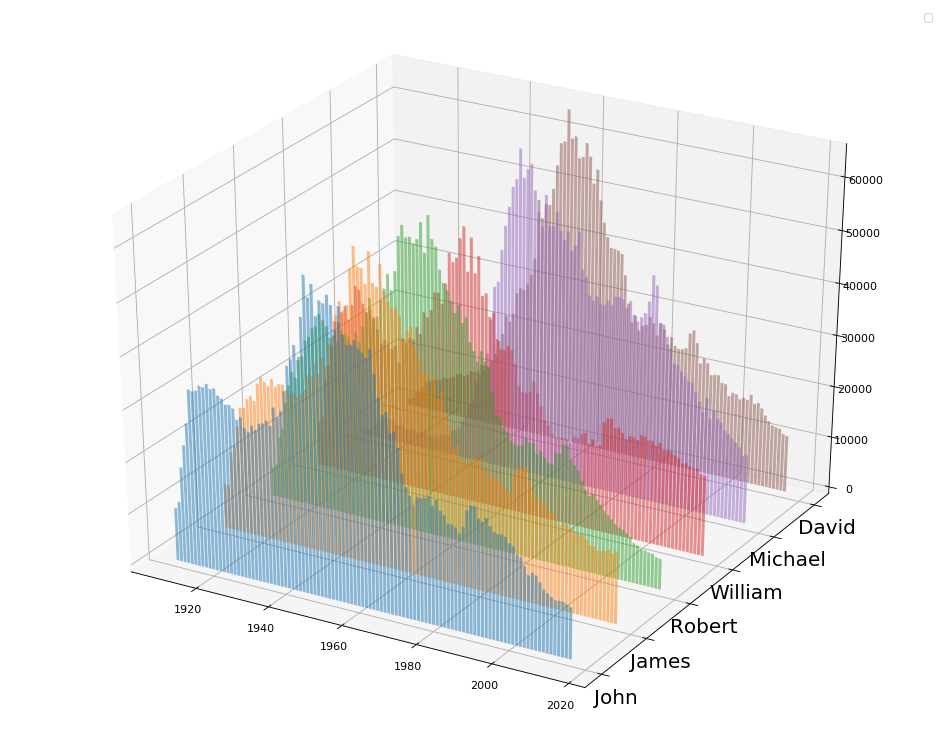

In [29]:
name_list = get_list_most_used_names()
#name_list = get_list_most_used_names_year()
plot_time_evolution_USA_list(name_list[0:6], _3D = True)
#plot_surface()

#### Same in 2D

/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


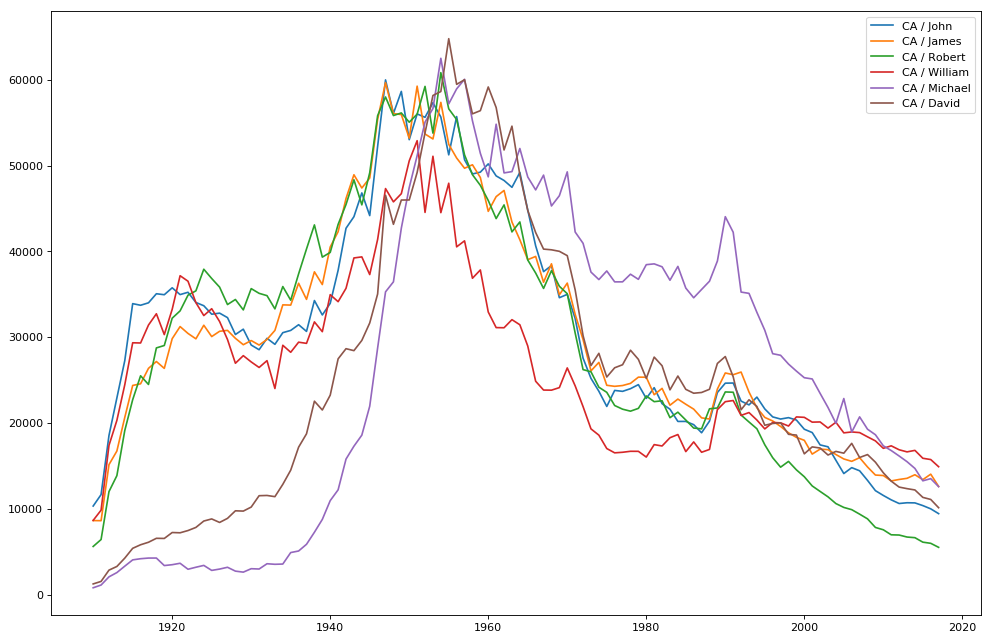

In [31]:

plot_time_evolution_USA_list(name_list[0:6])

/!\ plot_time_evolution_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


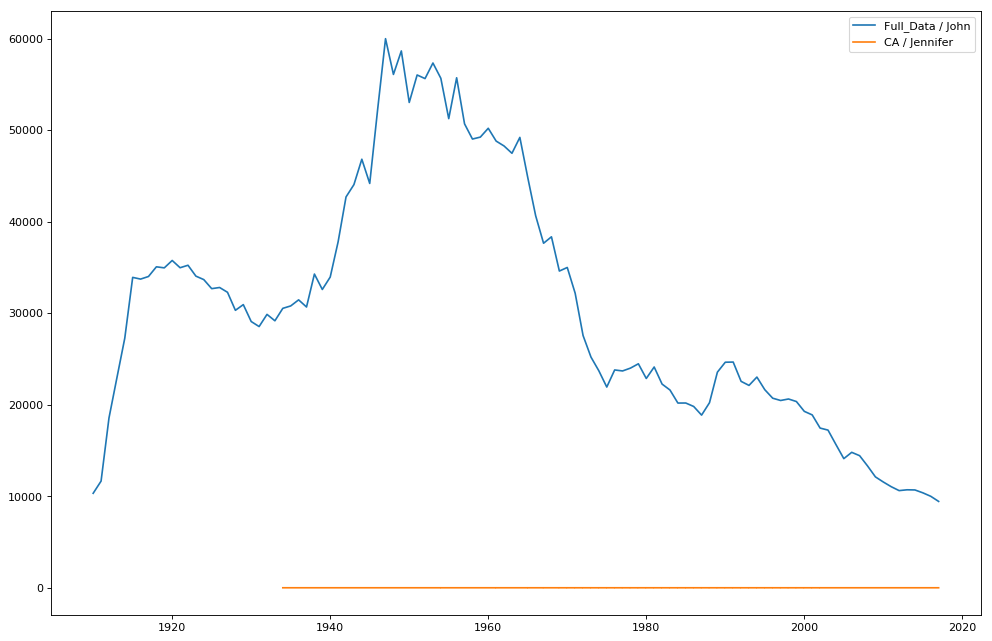

In [18]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plot_time_evolution_USA("John")
plot_time_evolution("CA","Jennifer")
plt.legend()

/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 
/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


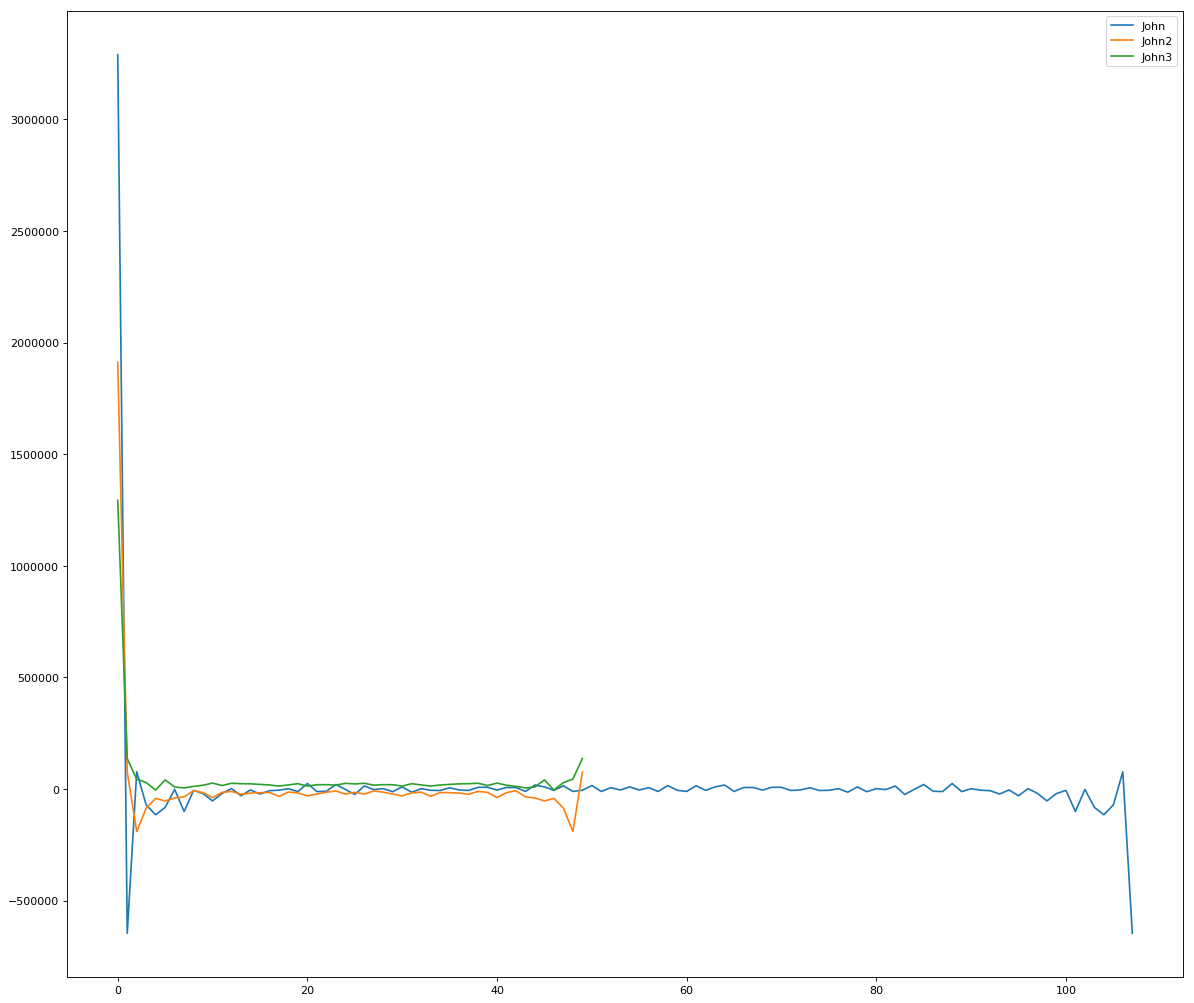

In [19]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for name in name_list[0:1]:
    #plt.semilogy(np.fft.fft(get_year_USA(name)), label=name)
    plt.plot(np.fft.fft(get_year_USA(name)), label=name)
    plt.plot(np.fft.fft(get_year_USA(name)[0:50]), label=name+"2")
    plt.plot(np.fft.fft(get_year_USA(name)[50:100]), label=name+"3")

plt.legend()
plt.show()

In [20]:
fft_list = np.fft.fft(get_year_USA(name))

/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ 


## Tests

#### Même prénom, évolution des régions avec le temps

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


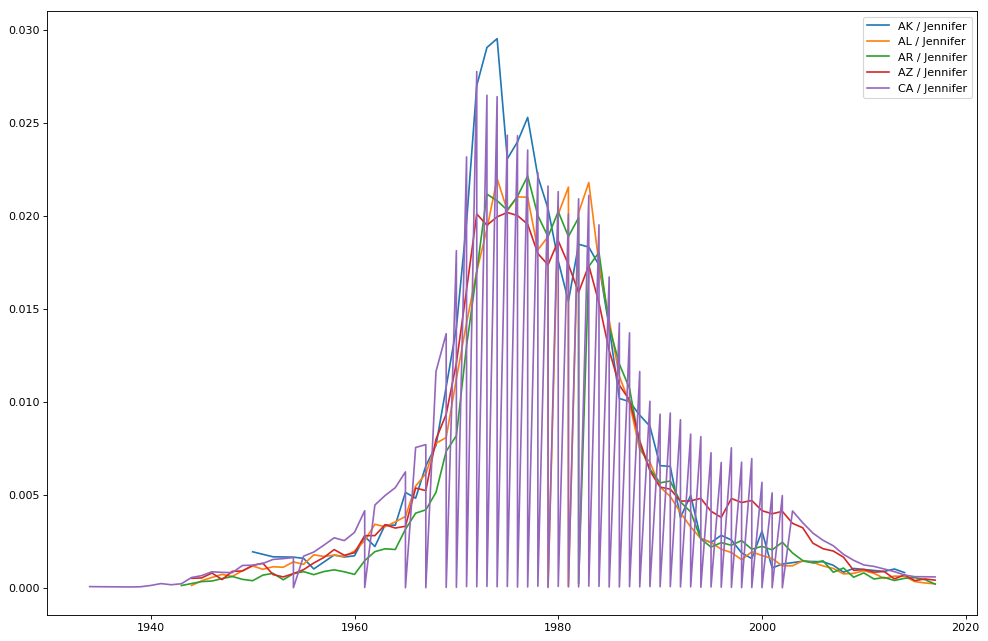

In [21]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

for state in get_list_states()[0:5]:
    plot_time_evolution(state, "Jennifer")
plt.legend()

#### On regarde la population des "Jennifer"

In [22]:
get_year("CA", "Jennifer")

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,State,Gender,Year,Name,Occurence,Sum,Percent
398211,CA,F,1934,Jennifer,5,63334.5,0.000079
403088,CA,F,1938,Jennifer,5,82397.0,0.000061
404362,CA,F,1939,Jennifer,6,83877.0,0.000072
405476,CA,F,1940,Jennifer,13,91953.0,0.000141
406760,CA,F,1941,Jennifer,24,98775.5,0.000243
408258,CA,F,1942,Jennifer,22,122614.0,0.000179
409803,CA,F,1943,Jennifer,30,129101.0,0.000232
411381,CA,F,1944,Jennifer,80,140612.5,0.000569
413072,CA,F,1945,Jennifer,99,147726.0,0.000670
414817,CA,F,1946,Jennifer,147,167503.5,0.000878


Du coup il va falloir réfléchir à comment on prend en compte les noms doubles. 
On retire le sexe faible ? </p>
DONC finalement on fera 2 tables ce sera plus simple

#### On regarde la répartition des prénoms en 2010

In [23]:
name_list = get_name(2016, "WY")
name_list.sort_values(by='Percent', ascending=False)

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,State,Gender,Year,Name,Occurence,Sum,Percent
5933151,WY,M,2016,Wyatt,46,2861.5,0.016075
5933152,WY,M,2016,Liam,38,2861.5,0.013280
5933027,WY,F,2016,Emma,36,2861.5,0.012581
5933153,WY,M,2016,William,34,2861.5,0.011882
5933154,WY,M,2016,Lincoln,30,2861.5,0.010484
5933028,WY,F,2016,Olivia,29,2861.5,0.010135
5933029,WY,F,2016,Harper,26,2861.5,0.009086
5933030,WY,F,2016,Ava,24,2861.5,0.008387
5933155,WY,M,2016,Henry,24,2861.5,0.008387
5933156,WY,M,2016,Isaac,24,2861.5,0.008387


Et on voit qu'aucun nom n'esr réellement récurent

#### On regarde l'évolution de la répartition des prénoms avec le temps

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


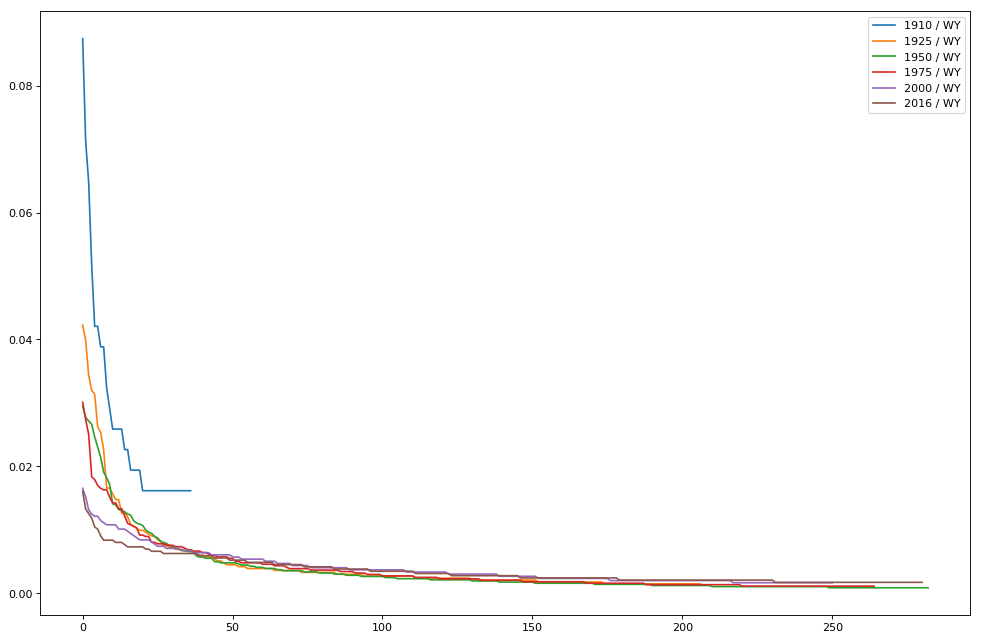

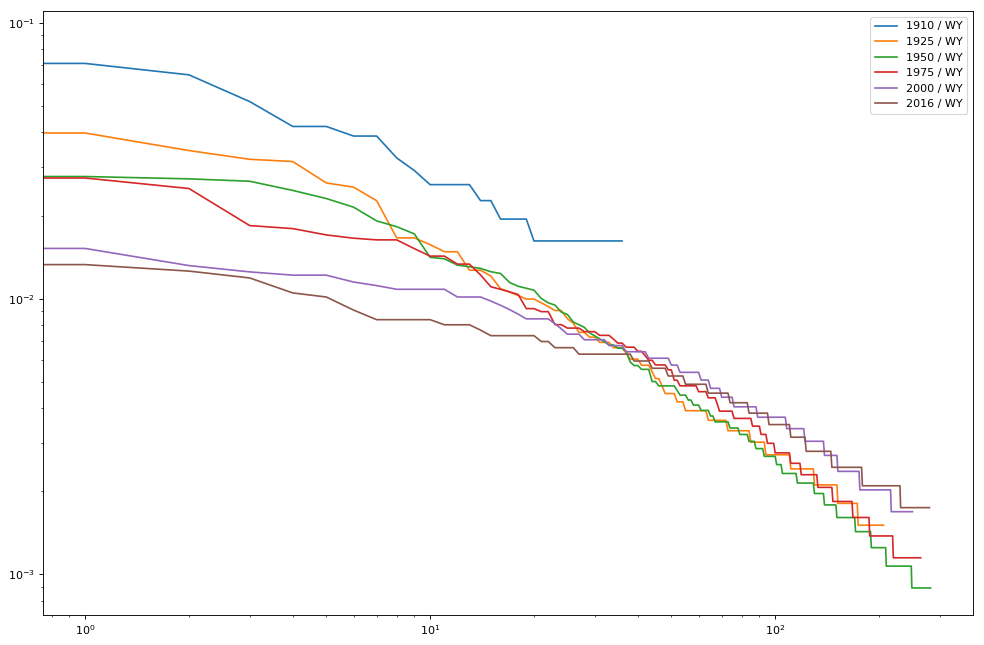

In [24]:
# ID par pourcentage décroissant (ou cumulé ?) VS Pourcentage
#Pour un état, à une année


figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plot_distribution(1910,"WY")
plot_distribution(1925,"WY")
plot_distribution(1950,"WY")
plot_distribution(1975,"WY")
plot_distribution(2000,"WY")
plot_distribution(2016,"WY")

plt.legend()


figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plot_log_distribution(1910,"WY")
plot_log_distribution(1925,"WY")
plot_log_distribution(1950,"WY")
plot_log_distribution(1975,"WY")
plot_log_distribution(2000,"WY")
plot_log_distribution(2016,"WY")

plt.legend()


###### Les valeurs manquentent faussent d'une certaine manière le %
Du coup, on a des trop bons % pour les prénoms. C'est le plus modifié lorsque beaucoup de valeurs manquent et donc à priori pour les années récentes car les noms sont de plus en plus diverses. Mais il y a aussi les petits états. <br/>
On pourrait potentiellement l'estimer pour ajouter cette valeur lors du calcul 
Ce qui me parait gênant c'est que cette erreur évolue avec le temps car elle dépend de la répartition des prénoms qui varie fortemenent. En plus, elle diminue fortement la précision des résultats récents.
L'idéal serait donc de pouvoir l'estimer et corriger nos valeurs et comparer les résultats avec ceux sans.

Idée :  croiser avec les données "nationales", du coup on sait combien de "Mary" sont existent mais ne sont pas dans le jeu de donnée

### Afficher les noms les plus présents en 2010

In [25]:
data_set[data_set["Year"]==1910].sort_values(by="Occurence", ascending=False)

,State,Gender,Year,Name,Occurence,Sum,Percent
4456187,PA,F,1910,Mary,2913,42037.0,0.069296
3771435,NY,F,1910,Mary,1923,45017.5,0.042717
4456188,PA,F,1910,Helen,1604,42037.0,0.038157
4456189,PA,F,1910,Anna,1534,42037.0,0.036492
4456594,PA,M,1910,John,1326,42037.0,0.031544
4456190,PA,F,1910,Margaret,1311,42037.0,0.031187
3771436,NY,F,1910,Helen,1290,45017.5,0.028656
3771886,NY,M,1910,John,1125,45017.5,0.024990
4063092,OH,F,1910,Mary,1099,20492.5,0.053629
1602657,IL,F,1910,Mary,1076,25817.5,0.041677


### Les prénoms les plus utilisés aux USA

<br/><br/><br/><br/>

# /!\ Autres trucs qui peuvent encore servir

## Des petites fonctions qu'on garde au cas ou

In [ ]:
# H1df.sort_values(by='B')
sorted_data_set = data_set.sort_values(by='Occurence', ascending=False)
most_used_names = np.unique(np.array(sorted_data_set[0:50]["Name"])) #Returns the most used names

In [ ]:
selected_names = data_set[data_set["Name"].isin(most_used_names)] #Filter to only keep the most used names

fig, ax = plt.subplots()
for label, grp in selected_names.groupby('Name'):
    grp.plot(x="Year", y = 'Occurence',ax = ax, label = label)

### Remplire les valeurs vides ! (A la base les lignes sans index)

In [ ]:
get_year_USA("Lisa").reindex(range(1910,2017)).fillna(0)

# Fonctions qui permettent de générer les .csv en fusionnant tous les .txt

In [ ]:
#To Merge every ".txt"
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

onlyfiles.remove('StateReadMe.pdf')

with open(path+'\merged', 'w') as outfile:
    for fname in filenames:
        with open(path+fname) as inficle:
            for line in infile:
                outfile.write(line)


In [349]:
#To create a csv file with the same format for every state (from a merged .txt)
path = '/Users/louis/Desktop/Tsinghua/Machine Learning/1_Project/DataSet/'
state = 'All_Merged'
full_path = path+state+'.txt'

delimiter = ";"
header = ["State","Gender","Year","Name","Occurence"]

data_set = pd.read_csv(full_path, sep=',|;', names = header, engine='python')

data_set.to_csv('All_Merged.csv',index=False)

# Fonctions qui permetent d'obtenir les % et de stocker en .csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = '/Users/louis/Desktop/Tsinghua/Machine Learning/1_Project/DataSet/'
state = 'All_Merged'
full_path = path+state+'.csv'

In [6]:
raw_data_set = pd.read_csv(full_path)

### On récupère la somme de tous les noms par région/année

In [7]:
#Permet de faire une opération (de moyenage) sur la ligne !
data_by_state_year = raw_data_set.pivot_table(index=["State","Year"],columns='Name',values="Occurence")

#A_data_by_state_year = raw_data_set.pivot_table(columns=["State","Year"],index='Name',values="Occurence")

In [8]:
temp_serie=data_by_state_year.apply(lambda x: x.sum(), axis=1)
#On obtient une série de valeurs qu'il faut ensuite ajouter

In [9]:
# On transforme la série en data frame
temp_df = pd.DataFrame({'index_tuple':temp_serie.index,'Sum':temp_serie.values}) #From panda series to dataFrame. 
# Pb : we have 2 indexes so it's a tuple. So we want to create 2 columns from it
temp_df[['State', 'Year']] = temp_df['index_tuple'].apply(pd.Series) # Done !
temp_df = temp_df.drop(columns  = "index_tuple") # Now we remove the tyuuple column ! 

# Let's merge the way we do with data-bases
data_set = pd.merge(raw_data_set, temp_df, on=['State', 'Year']).drop_duplicates() 


### On ajoute le %

In [10]:
data_set = data_set.assign(Percent=(data_set["Occurence"]/data_set["Sum"]).values)

In [11]:
# We check to be sure the sum of the % equals to 1 !
data_set[data_set["State"]=="AK"][data_set["Year"]==1915]["Percent"].sum()

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1.0

### On enregistre le tout

In [13]:
data_set.to_csv('Full_Data.csv',index=False)

In [175]:
import tensorflow